In [39]:
import requests

In [40]:
import calendar
import datetime

In [41]:
import pickle as pkl
posts = []
comments = []
posts = pkl.load(open("../data/posts_since_2018.pkl", "rb"))
comments = pkl.load(open("../data/comments_since_2018.pkl", "rb"))

In [42]:
posts[0]

{'all_awardings': [],
 'allow_live_comments': False,
 'author': 'Thisiskindacoolig',
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_text': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_4safutxz',
 'author_patreon_flair': False,
 'awarders': [],
 'can_mod_post': False,
 'contest_mode': False,
 'created_utc': 1570927018,
 'domain': 'i.redd.it',
 'full_link': 'https://www.reddit.com/r/Rateme/comments/dh3ha2/hows_my_smile/',
 'gildings': {},
 'id': 'dh3ha2',
 'is_crosspostable': False,
 'is_meta': False,
 'is_original_content': False,
 'is_reddit_media_domain': True,
 'is_robot_indexable': False,
 'is_self': False,
 'is_video': False,
 'link_flair_background_color': '',
 'link_flair_richtext': [],
 'link_flair_text_color': 'dark',
 'link_flair_type': 'text',
 'locked': False,
 'media_only': False,
 'no_follow': True,
 'num_comments': 2,
 'num_crossposts': 0,
 'over_18': False,
 'parent_whitelist_status': 'house_only',
 'permalink': '/r/Rateme/co

In [43]:
comments[0]

{'all_awardings': [],
 'associated_award': None,
 'author': 'Ipingpong1',
 'author_flair_background_color': None,
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_template_id': None,
 'author_flair_text': None,
 'author_flair_text_color': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_z9zyj',
 'author_patreon_flair': False,
 'awarders': [],
 'body': 'If you can consistently smile like you did in that second picture you’re an easy 8',
 'created_utc': 1570927355,
 'gildings': {},
 'id': 'f3hqvo0',
 'is_submitter': False,
 'link_id': 't3_dgzjxh',
 'locked': False,
 'no_follow': True,
 'parent_id': 't3_dgzjxh',
 'permalink': '/r/Rateme/comments/dgzjxh/21m/f3hqvo0/',
 'retrieved_on': 1570927367,
 'score': 1,
 'send_replies': True,
 'steward_reports': [],
 'stickied': False,
 'subreddit': 'Rateme',
 'subreddit_id': 't5_2re84',
 'total_awards_received': 0}

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

In [45]:
from pandas.io.json import json_normalize

In [46]:
df = json_normalize(posts)

In [47]:
df['num_comments'].describe()

count    79000.000000
mean         8.011152
std         20.913903
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        587.000000
Name: num_comments, dtype: float64

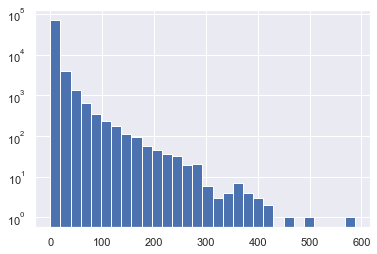

In [48]:
df['num_comments'].hist(bins=30, log=True)

In [49]:
df.to_csv("../data/posts.csv")

In [50]:
df['title'].apply(lambda x: len(x)).describe()

count    79000.000000
mean        57.226000
std         48.439328
min          1.000000
25%         24.000000
50%         44.000000
75%         76.000000
max        311.000000
Name: title, dtype: float64

In [51]:
df[ df['title'].apply(lambda x: len(x) == 1) ]['title'].value_counts()

?    12
.     7
A     4
H     3
Y     3
B     3
R     3
M     3
🤔     2
h     2
K     2
🖤     2
😉     2
#     1
😁     1
😶     1
😕     1
💜     1
f     1
🔥     1
!     1
l     1
­     1
Z     1
😌     1
😳     1
💟     1
2     1
💘     1
😥     1
💖     1
🙏     1
G     1
😈     1
s     1
😊     1
🙃     1
🦔     1
👋     1
E     1
N     1
👤     1
🤤     1
Name: title, dtype: int64

In [52]:
comment_df = json_normalize(comments)

In [53]:
comment_df['author'].unique().size

66228

In [54]:
comment_df['author'].size

620000

In [55]:
620000 / 66228

9.361599323548953

In [56]:
author_counts = comment_df.groupby('author').agg('count')['author_fullname']

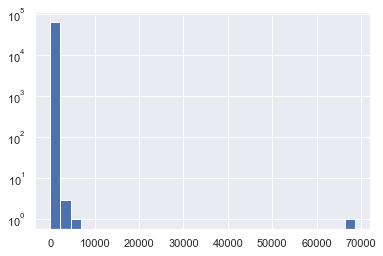

In [57]:
author_counts.hist(bins=30, log=True)

In [58]:
author_counts.describe()

count    66228.000000
mean         8.401341
std        269.997964
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      68551.000000
Name: author_fullname, dtype: float64

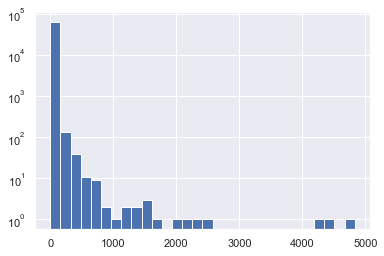

In [59]:
author_counts.drop('AutoModerator').hist(log=True, bins=30)

In [60]:
author_counts.drop('AutoModerator').argmax()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


'ChickenXing'

In [61]:
comment_df[ comment_df['author'] == 'ChickenXing']['link_id'].head(50).apply(lambda lid: df[df['id'] == lid[3:]]['title'].to_numpy()[0])

625                 [F18] just curious + need some advice
663     [19f] just looking for a face rating... thanks...
664                 [F18] just curious + need some advice
765                          [F 24] Thoughts on my style?
768          [19f] hit me with your best shot and RATE ME
773     [26F] Looking for advice on hairstyle/makeup t...
780     (F21) Struggling with identity, blonde/brunett...
789     [21F] Rate me (pics without makeup at end of i...
798     [F21] Rate me on a scale from 1-10! Feel free ...
800     [22F] All my best photos are ones that exclude...
801     (F21) been in a bit of a rut lately, looking t...
1842    [f24] ruthlessly rate me and tell me what plas...
2036    [18F] Curious to know what the people of Reddi...
2038    [19f] Non-binary femme, updated since i last p...
2040    [23F] and genuinely curious about what people ...
2042    (35F) just curious where I stand and what I ca...
2048                 [F19] Just curious what people think
2050    [21F] 

In [62]:
"removed" in list(df)

False

In [63]:
posts_df_cleaned = df[['author', 'full_link','id','num_comments','title']].copy()
posts_df_cleaned

,author,full_link,id,num_comments,title
0,Thisiskindacoolig,https://www.reddit.com/r/Rateme/comments/dh3ha...,dh3ha2,2,Hows my smile?
1,Hamzokxx,https://www.reddit.com/r/Rateme/comments/dh3b6...,dh3b61,1,[20M] What do you think of the Arabic /Russian...
2,Hanerbernerner,https://www.reddit.com/r/Rateme/comments/dh37s...,dh37sw,2,Kinda low self esteem. Honest feedback please....
3,ratemethrowaway567,https://www.reddit.com/r/Rateme/comments/dh368...,dh368y,18,[25 F] Got a haircut today. Some are with make...
4,kcalderero,https://www.reddit.com/r/Rateme/comments/dh32c...,dh32ch,1,#RateMe
...,...,...,...,...,...
78995,lovejoexoxo,https://www.reddit.com/r/Rateme/comments/7mcbv...,7mcbv4,1,[22 M] Always felt like I was attractive to wo...
78996,iliana_wants_death,https://www.reddit.com/r/Rateme/comments/7mc9a...,7mc9ap,2,I'm bored so rate me I guess
78997,Jacob3900,https://www.reddit.com/r/Rateme/comments/7mc6w...,7mc6wn,1,Lost 30
78998,rares9730,https://www.reddit.com/r/Rateme/comments/7mc62...,7mc62t,1,So i know i don t necessarily look average but...


In [131]:
def clean_title(x):
    # ((f|F|m|M)\s*\d+)|(\d+\s*(f|F|m|M))
    # new, ((f|F|m|M)\s*(\d+))|((\d+)\s*(f|F|m|M))
    matchOne = re.search('(f|F|m|M)\s*(\d+)', x)
    matchTwo = re.search('(\d+)\s*(f|F|m|M)', x)
    
    matchAge = None
    matchGender = None
    
    if not matchOne and not matchTwo:
        return (None, None)
    elif matchOne and not matchTwo:
        matchGender, matchAge  = (matchOne.group(1).upper(), int(matchOne.group(2)))
    elif not matchOne and matchTwo:
        matchGender, matchAge = (matchTwo.group(2).upper(), int(matchTwo.group(1)))
    else:
        if int(matchOne.group(2)) < int(matchTwo.group(1)):
            matchGender, matchAge = (matchOne.group(1).upper(), int(matchOne.group(2)))
        else:
            matchGender, matchAge = (matchTwo.group(2).upper(), int(matchTwo.group(1)))
    
    if matchAge >= 18 and matchAge < 50:
        return (matchGender, matchAge)
    
    
    
    
    
#     if match and int(match.group(2)) >= 18 and int(match.group(2)) < 100:
#             return (match.group(1).upper(), int(match.group(2)))
#     match = re.search('(\d+)\s*(f|F|m|M)', x)
#     if match and int(match.group(1)) >= 18 and int(match.group(1)) < 100:
#         return (match.group(2).upper(), int(match.group(1)))
#     return (None, None)

In [132]:
for post in posts_df_cleaned['title'].to_numpy()[:10]:
    print(post)

Hows my smile?
[20M] What do you think of the Arabic /Russian mix ☺️?
Kinda low self esteem. Honest feedback please. Also, I'm aware of the weight problem and working on it.
[25 F] Got a haircut today. Some are with makeup, some without. Does my haircut and glasses match my face? Any style/look tips? I've never been very skilled with fashion or makeup but would like to get there one day. Thanks!
#RateMe
[18M] I’d Appreciate Any Feedback! (I already know I look young...)
#FeelingMyself #Sexy
[18] Any Tips? (I know I look young..)
18F. Just be honest lol
[20M] What do you think of the Arabic/Russian mix ☺️?


In [133]:
parsed_titles = posts_df_cleaned['title'].apply(clean_title)
posts_df_cleaned['gender'] = parsed_titles.apply(lambda x: x[0] if x is not None else None)
posts_df_cleaned['age'] = parsed_titles.apply(lambda x: x[1] if x is not None else None)
posts_df_cleaned.head()

,author,full_link,id,num_comments,title,gender,age
0,Thisiskindacoolig,https://www.reddit.com/r/Rateme/comments/dh3ha...,dh3ha2,2,Hows my smile?,None,NaN
1,Hamzokxx,https://www.reddit.com/r/Rateme/comments/dh3b6...,dh3b61,1,[20M] What do you think of the Arabic /Russian...,M,20.0
2,Hanerbernerner,https://www.reddit.com/r/Rateme/comments/dh37s...,dh37sw,2,Kinda low self esteem. Honest feedback please....,None,NaN
3,ratemethrowaway567,https://www.reddit.com/r/Rateme/comments/dh368...,dh368y,18,[25 F] Got a haircut today. Some are with make...,F,25.0
4,kcalderero,https://www.reddit.com/r/Rateme/comments/dh32c...,dh32ch,1,#RateMe,None,NaN


In [134]:
# comment_df.groupby('author').agg('count')
posts_df_cleaned['gender'].value_counts()

M    39320
F    12709
Name: gender, dtype: int64

* remove automod deleted posts
* do regex
* see what percent of posts are classified, 75% of automod filtered
* ((f|F|m|M)\s*(\d+))|((\d+)\s*(f|F|m|M))

In [135]:
automod_comments = comment_df[comment_df['author'] == 'AutoModerator']
auto_remove = 'Your submission has been automatically removed because the title does not include one of the required tags. Please check the sidebar for information about tagging your submission properly and make sure your new submission follows rules 1-8.\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Rateme) if you have any questions or concerns.*'
automod_comments_removed_ids = automod_comments[ automod_comments['body'] == auto_remove ]['link_id'].to_numpy().tolist()
automod_comments_removed_ids = [x[3:] for x in automod_comments_removed_ids]
removed_automod_cleaned = posts_df_cleaned[ posts_df_cleaned['id'].apply(lambda x: x not in automod_comments_removed_ids) == True ]




In [136]:
posts_df_cleaned = posts_df_cleaned [ posts_df_cleaned['gender'] != 'none' ]

In [137]:
np.in1d(posts_df_cleaned['id'].to_numpy().tolist(),removed_automod_cleaned['id'].to_numpy().tolist())

array([False,  True,  True, ...,  True,  True,  True])

In [138]:
removed_automod_cleaned

,author,full_link,id,num_comments,title,gender,age
1,Hamzokxx,https://www.reddit.com/r/Rateme/comments/dh3b6...,dh3b61,1,[20M] What do you think of the Arabic /Russian...,M,20.0
2,Hanerbernerner,https://www.reddit.com/r/Rateme/comments/dh37s...,dh37sw,2,Kinda low self esteem. Honest feedback please....,None,NaN
3,ratemethrowaway567,https://www.reddit.com/r/Rateme/comments/dh368...,dh368y,18,[25 F] Got a haircut today. Some are with make...,F,25.0
5,jacobmidd,https://www.reddit.com/r/Rateme/comments/dh2wi...,dh2wii,13,[18M] I’d Appreciate Any Feedback! (I already ...,M,18.0
8,ArtPicture12,https://www.reddit.com/r/Rateme/comments/dh2pb...,dh2pb7,2,18F. Just be honest lol,F,18.0
...,...,...,...,...,...,...,...
78995,lovejoexoxo,https://www.reddit.com/r/Rateme/comments/7mcbv...,7mcbv4,1,[22 M] Always felt like I was attractive to wo...,M,22.0
78996,iliana_wants_death,https://www.reddit.com/r/Rateme/comments/7mc9a...,7mc9ap,2,I'm bored so rate me I guess,None,NaN
78997,Jacob3900,https://www.reddit.com/r/Rateme/comments/7mc6w...,7mc6wn,1,Lost 30,None,NaN
78998,rares9730,https://www.reddit.com/r/Rateme/comments/7mc62...,7mc62t,1,So i know i don t necessarily look average but...,None,NaN


In [139]:
removed_automod_cleaned['age'].dropna().astype(int).describe()

count    51149.000000
mean        22.198538
std          4.301792
min         18.000000
25%         19.000000
50%         21.000000
75%         24.000000
max         49.000000
Name: age, dtype: float64

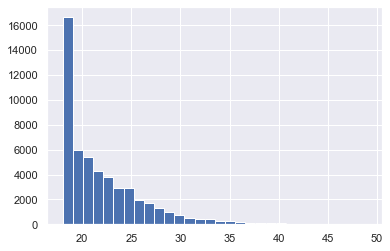

In [140]:
removed_automod_cleaned['age'].hist(bins=30)

In [141]:
removed_automod_cleaned = removed_automod_cleaned[removed_automod_cleaned.age != 99]

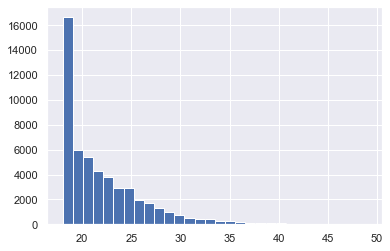

In [142]:
removed_automod_cleaned['age'].hist(bins=30)

In [143]:
removed_automod_cleaned['age'].dropna().astype(int).describe()

count    51149.000000
mean        22.198538
std          4.301792
min         18.000000
25%         19.000000
50%         21.000000
75%         24.000000
max         49.000000
Name: age, dtype: float64

In [144]:
removed_automod_cleaned.sort_values('age', ascending=False).head(50)

,author,full_link,id,num_comments,title,gender,age
57474,kajola1969,https://www.reddit.com/r/Rateme/comments/916cu...,916cu8,13,"[M49], feedback to this old dude :-) Thanks",M,49.0
16786,bani70,https://www.reddit.com/r/Rateme/comments/c17gi...,c17gig,2,[M49] Go ahead let me have it,M,49.0
72390,UCanShredat50,https://www.reddit.com/r/Rateme/comments/82trb...,82trbf,1,I’m 49/male looking for some honest feed back ...,M,49.0
21020,WickedLost,https://www.reddit.com/r/Rateme/comments/bq2iw...,bq2iwi,3,[M49] I had been about 30lbs overweight my who...,M,49.0
26077,guy197,https://www.reddit.com/r/Rateme/comments/bbydw...,bbydw8,3,49 m,M,49.0
13517,Master_of_Frogs,https://www.reddit.com/r/Rateme/comments/carzw...,carzw1,3,[48M] I submit myself to the hivemind. (album ...,M,48.0
76746,[deleted],https://www.reddit.com/r/Rateme/comments/7rmhk...,7rmhkm,1,[48F] Rate?,F,48.0
33802,venozera,https://www.reddit.com/r/Rateme/comments/apbol...,apbolv,2,[48F] my mom wanted a honest rating (burmese),F,48.0
72730,RattleheadM,https://www.reddit.com/r/Rateme/comments/81wlv...,81wlv1,1,M48 I just got these glasses today. What do yo...,M,48.0
39171,TylerJP01,https://www.reddit.com/r/Rateme/comments/abicf...,abicfs,1,[M48] Divorced. Going to start dating again so...,M,48.0
